## Expense Management Discrepancies (Flag 19)

### Dataset Description
The dataset consists of 500 entries simulating ServiceNow fm_expense_line table, which records various attributes of financial expenses. Key fields include 'number', 'opened_at', 'amount', 'state', 'short_description', 'ci', 'user', 'department', 'category', 'process_date', 'source_id', and 'type'. This table documents the flow of financial transactions by detailing the amount, departmental allocation, and the nature of each expense. Provides a clear view of organizational expenditures across different categories, highlighting both the timing and the approval state of each financial entry.

### Your Task
**Goal**: To uncover and address the reasons behind the varying rates of expense rejections across departments to improve overall financial management within the organization.

**Role**: Financial Compliance Analyst

**Difficulty**: 3 out of 5.

**Category**: Financial Management


### Import Necessary Libraries
This cell imports all necessary libraries required for the analysis. This includes libraries for data manipulation, data visualization, and any specific utilities needed for the tasks. 

In [1]:
import argparse
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas import date_range

### Load Dataset
This cell loads the expense dataset from a CSV file into a DataFrame. It involves specifying the path to the dataset, using pandas to read the file, and confirming its successful load by displaying the first few entries.

In [2]:
dataset_path = "csvs/flag-19.csv"
flag_data = pd.read_csv(dataset_path)
df = pd.read_csv(dataset_path)
flag_data.head()


,number,source_id,user,amount,processed_date,opened_at,department,state,category,short_description,ci
0,EXP00000000,UTY-46750817,Carolina Kinlaw,584,NaN,2024-04-26 18:11:00,Sales,Pending,Services,Provision of Services for iPod touch,ISP Services
1,EXP00000001,CKX-70446459,Mamie Mcintee,3178,NaN,2023-10-03 08:08:00,Product Management,Submitted,Assets,Asset assignment for new Dell Laptop,Dell XPS 13
2,EXP00000002,NaN,Cristina Sharper,3278,2024-03-14 10:18:00.000000000,2024-03-13 10:18:00,Sales,Processed,Miscellaneous,Miscellaneous hardware component,Random Access Memory Component
3,EXP00000003,SRP-53496117,Raphael Bickel,8712,2023-06-20 17:32:56.784775309,2023-06-18 17:21:00,Sales,Processed,Assets,Dell OptiPlex 7050 Desktop Asset,OptiPlex 7050
4,EXP00000004,EAN-07942806,Helena Suermann,1307,2023-10-06 04:31:00.000000000,2023-10-05 04:31:00,Customer Support,Processed,Services,Deployed service-related asset,Cloud Database Service


### **Question 1: Which departments have higher proportions of expense rejections compared to the organizational average?**

#### Plot proportion of declined expenses by department
This visualization displays a bar plot representing the proportion of expense submissions that were declined within each department. The red bars indicate the percentage of rejections relative to total expenses processed per department. This analysis is crucial for identifying departments that may require additional training on expense reporting procedures etc.

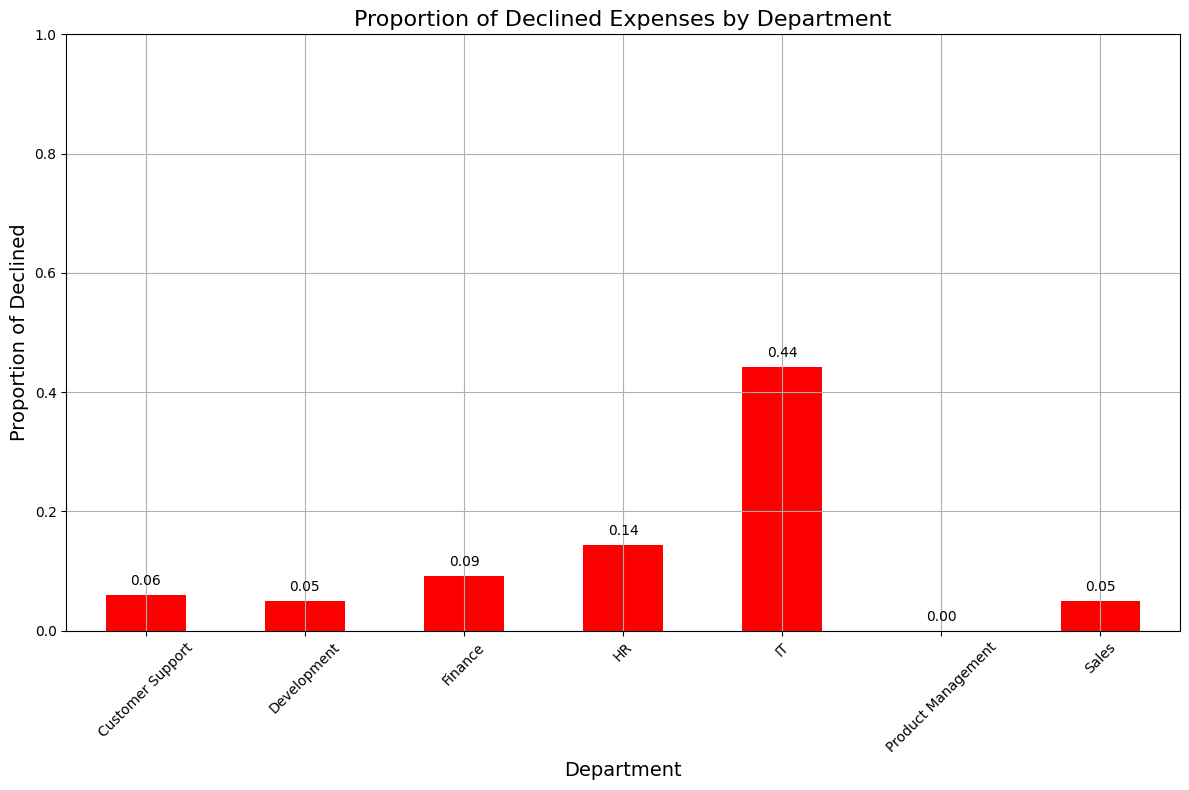

In [3]:
import matplotlib.pyplot as plt

# Group the data by department and state and count occurrences
department_state_counts = flag_data.groupby(['department', 'state']).size().unstack(fill_value=0)

# Calculate proportions of each state within each department
department_state_proportions = department_state_counts.div(department_state_counts.sum(axis=1), axis=0)

# Plot the data, focusing only on the 'Declined' state
fig, ax = plt.subplots(figsize=(12, 8))
department_state_proportions['Declined'].plot(kind='bar', color='red', ax=ax)

# Add titles and labels
ax.set_title('Proportion of Declined Expenses by Department', fontsize=16)
ax.set_xlabel('Department', fontsize=14)
ax.set_ylabel('Proportion of Declined', fontsize=14)
ax.set_ylim(0, 1)  # Set y-axis limit to show proportions from 0 to 1

# Show grid
ax.grid(True)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to not cut off labels

# Adding numeric labels on top of the bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Show the plot
plt.show()


#### Generate JSON Description for the Insight

In [4]:
{
    "data_type": "descriptive",
    "insight": "There is a significant variance in Expense Rejection Rates across departments",
    "insight_value": {
        "description": "The IT department exhibits a notably higher proportion of expense rejections compared to other departments with 44%, indicating potential issues with budget compliance or policy understanding."
    },
    "plot": {
        "plot_type": "bar",
        "title": "Proportion of Declined Expenses by Department",
        "x_axis": {
            "name": "Department",
            "value": ["IT", "HR", "Finance", "Customer Support", "Development", "Sales", "Product Management"],
            "description": "This axis categorizes expenses based on department affiliation."
        },
        "y_axis": {
            "name": "Proportion of Declined",
            "value": {
                "IT": "0.44",
                "HR": "0.14",
                "Finance": "0.09",
                "Customer Support": "0.06",
                "Development": "0.05",
                "Sales": "0.05",
                "Product Management": "0.00"
            },
            "description": "This axis displays the proportion of expenses declined within each department, highlighting the higher rejection rates particularly in the IT department."
        },
        "description": "The bar chart illustrates the discrepancies in expense rejection rates among departments, with IT facing the highest rejection rate at 44%. This outlier suggests a specific challenge within the IT department's expense management process that requires immediate attention to improve compliance and understanding of financial policies."
    },
    "question": "Which departments have higher proportions of expense rejections compared to the organizational average?",
    "actionable_insight": "Given the high rejection rates in the IT department, a targeted review of expense submission procedures and training on policy compliance is recommended. This action should aim to align IT's expense management practices with organizational standards and reduce the high rate of declined expenses. Additionally, understanding the root causes of these rejections could inform broader improvements in expense processing protocols across the organization."
}


{'data_type': 'descriptive',
 'insight': 'There is a significant variance in Expense Rejection Rates across departments',
 'insight_value': {'description': 'The IT department exhibits a notably higher proportion of expense rejections compared to other departments with 44%, indicating potential issues with budget compliance or policy understanding.'},
 'plot': {'plot_type': 'bar',
  'title': 'Proportion of Declined Expenses by Department',
  'x_axis': {'name': 'Department',
   'value': ['IT',
    'HR',
    'Finance',
    'Customer Support',
    'Development',
    'Sales',
    'Product Management'],
   'description': 'This axis categorizes expenses based on department affiliation.'},
  'y_axis': {'name': 'Proportion of Declined',
   'value': {'IT': '0.44',
    'HR': '0.14',
    'Finance': '0.09',
    'Customer Support': '0.06',
    'Development': '0.05',
    'Sales': '0.05',
    'Product Management': '0.00'},
   'description': 'This axis displays the proportion of expenses declined withi

### **Question 2:  What is the distribution of Expense Reports by Department?**


#### Plot number of expense reports by department
This cell visualizes the distribution of expense reports across different departments using a bar plot. Each blue bar represents the total number of expense reports submitted by a particular department. This plot is essential for assessing the volume of financial transactions handled by each department and identifying which departments are more active in submitting expenses.

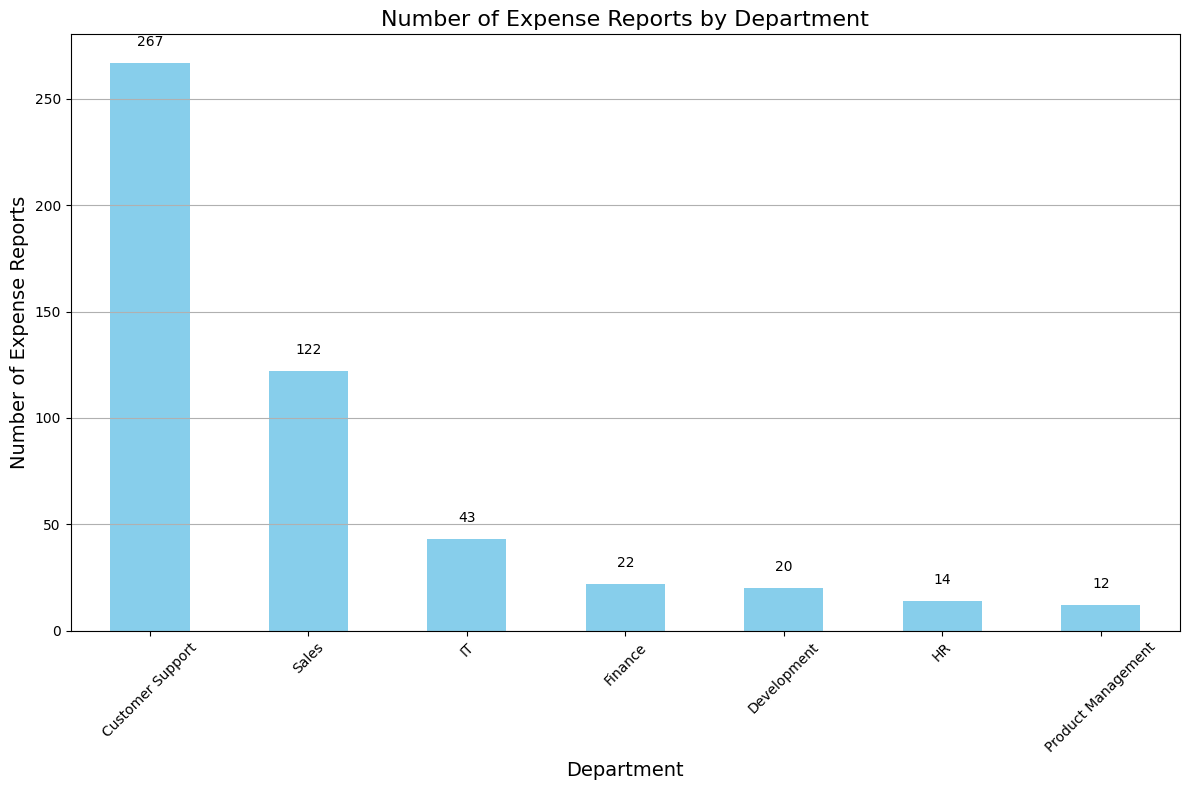

In [5]:
import matplotlib.pyplot as plt

# Count the number of expense reports per department
department_counts = flag_data['department'].value_counts()

# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))
department_counts.plot(kind='bar', color='skyblue', ax=ax)

# Add titles and labels
ax.set_title('Number of Expense Reports by Department', fontsize=16)
ax.set_xlabel('Department', fontsize=14)
ax.set_ylabel('Number of Expense Reports', fontsize=14)

# Show grid
ax.grid(axis='y')  # Only horizontal grid lines for readability

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to not cut off labels

# Adding numeric labels on top of the bars for clarity
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', xytext=(0, 10), textcoords='offset points')

# Show the plot
plt.show()

#### Generate JSON Description for the Insight

In [6]:
{
    "data_type": "descriptive",
    "insight": "There is no correlation between the number of expense reports submitted and rejection rates",
    "insight_value": {
        "description": "Despite having a lower volume of expense submissions, the IT department has the highest rejection rate, while departments with higher submission volumes like Customer Support exhibit lower rejection rates."
    },
    "plot": {
        "plot_type": "bar",
        "title": "Distribution of Expense Reports by Department",
        "x_axis": {
            "name": "Department",
            "value": ["Customer Support", "Sales", "IT", "Finance", "Development", "HR", "Product Management"],
            "description": "This axis categorizes expenses based on department affiliation."
        },
        "y_axis": {
            "name": "Number of Expense Reports",
            "value": {
                "Customer Support": "267",
                "Sales": "122",
                "IT": "43",
                "Finance": "22",
                "Development": "20",
                "HR": "14",
                "Product Management": "12"
            },
            "description": "This axis displays the number of expense reports submitted by each department, revealing that Customer Support submits the most, while IT, despite its high rejection rate, submits far fewer."
        },
        "description": "The bar chart vividly illustrates the number of expense reports submitted by each department. The data highlight that the volume of submissions does not correlate with the proportion of rejections, as seen with the IT department, which submits fewer reports but faces a high rate of rejections."
    },
    "question": "What is the distribution of Expense Reports by Department?",
    "actionable_insight": "This discrepancy in rejection rates despite lower submission volumes suggests underlying issues in IT’s expense reporting process or stricter scrutiny of their reports. It would be prudent to conduct a detailed review of the IT department's submissions to understand the reasons behind the high rejection rates. Efforts should be focused on aligning IT’s expense reporting practices with those departments exhibiting high compliance and low rejection rates, like Customer Support, to reduce unnecessary financial discrepancies and improve procedural compliance."
}


{'data_type': 'descriptive',
 'insight': 'There is no correlation between the number of expense reports submitted and rejection rates',
 'insight_value': {'description': 'Despite having a lower volume of expense submissions, the IT department has the highest rejection rate, while departments with higher submission volumes like Customer Support exhibit lower rejection rates.'},
 'plot': {'plot_type': 'bar',
  'title': 'Distribution of Expense Reports by Department',
  'x_axis': {'name': 'Department',
   'value': ['Customer Support',
    'Sales',
    'IT',
    'Finance',
    'Development',
    'HR',
    'Product Management'],
   'description': 'This axis categorizes expenses based on department affiliation.'},
  'y_axis': {'name': 'Number of Expense Reports',
   'value': {'Customer Support': '267',
    'Sales': '122',
    'IT': '43',
    'Finance': '22',
    'Development': '20',
    'HR': '14',
    'Product Management': '12'},
   'description': 'This axis displays the number of expense r

### **Question 3:  Is there any specific user within the IT department with most declined requests, or is the trend more or less uniform across the department?**


#### Plot number of declined expense reports by user in the IT Department
This cell generates a bar plot to visualize the number of declined expense reports by individual users within the IT department. Each bar represents a specific user and the count of their expense reports that have been declined.

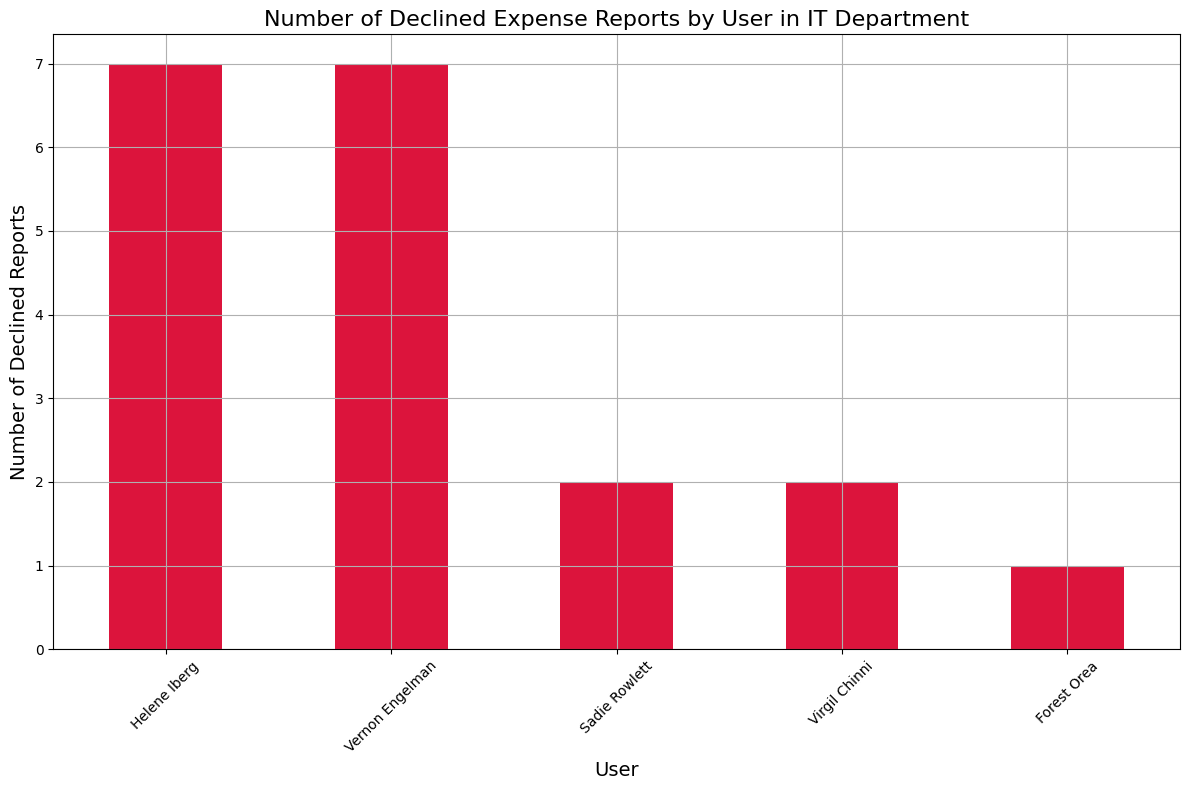

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'flag_data' is your DataFrame with the expense report data
# Filter the data to include only IT department and declined expenses
it_expenses = flag_data[(flag_data['department'] == 'IT') & (flag_data['state'] == 'Declined')]

# Count occurrences of declined reports by each user in the IT department
user_declined_counts = it_expenses.groupby('user').size().sort_values(ascending=False)

# Create a bar plot of the counts
fig, ax = plt.subplots(figsize=(12, 8))
user_declined_counts.plot(kind='bar', color='crimson', ax=ax)

# Add titles and labels
ax.set_title('Number of Declined Expense Reports by User in IT Department', fontsize=16)
ax.set_xlabel('User', fontsize=14)
ax.set_ylabel('Number of Declined Reports', fontsize=14)

# Show grid
ax.grid(True)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to not cut off labels

# Show the plot
plt.show()


#### Generate JSON Description for the Insight

In [8]:
{
    "data_type": "diagnostic",
    "insight": "There is a concentration of Declined Expenses among specific users in IT Department",
    "insight_value": {
        "description": "Helene Iberg and Vernon Engelman each have 7 declined expense requests, significantly higher compared to other IT department members who have atleast one rejection, indicating potential issues with how expenses are submitted or understood by these individuals and the whole department."
    },
    "plot": {
        "plot_type": "bar",
        "title": "Number of Declined Expense Reports by User in IT Department",
        "x_axis": {
            "name": "User",
            "value": ["Helene Iberg", "Vernon Engelman", "Other Members"],
            "description": "This axis categorizes users within the IT department based on the number of their declined expense reports."
        },
        "y_axis": {
            "name": "Number of Declined Reports",
            "value": "Count of Declined Reports",
            "description": "This axis displays the count of declined expense reports for each user, with specific focus on those with the highest numbers."
        },
        "description": "The bar chart illustrates that while most IT department members have at least one declined expense report, Helene Iberg and Vernon Engelman stand out with seven each. This suggests a specific issue with the expense reporting practices of these two individuals."
    },
    "question": "Is there any specific user within the IT department with most declined requests, or is the trend more or less uniform across the department?",
    "actionable_insight": "To address the high number of declined requests by Helene Iberg and Vernon Engelman, it is prescriptive to conduct a detailed review of the expense reporting guidelines and training provided to the IT department. Focusing specifically on the submission errors or misunderstandings by these users could lead to improved compliance and fewer rejections. Additionally, implementing a mentoring or peer review system for expense submissions within the IT department could help in reducing errors and ensuring better adherence to the company's reimbursement policies."
}


{'data_type': 'diagnostic',
 'insight': 'There is a concentration of Declined Expenses among specific users in IT Department',
 'insight_value': {'description': 'Helene Iberg and Vernon Engelman each have 7 declined expense requests, significantly higher compared to other IT department members who have atleast one rejection, indicating potential issues with how expenses are submitted or understood by these individuals and the whole department.'},
 'plot': {'plot_type': 'bar',
  'title': 'Number of Declined Expense Reports by User in IT Department',
  'x_axis': {'name': 'User',
   'value': ['Helene Iberg', 'Vernon Engelman', 'Other Members'],
   'description': 'This axis categorizes users within the IT department based on the number of their declined expense reports.'},
  'y_axis': {'name': 'Number of Declined Reports',
   'value': 'Count of Declined Reports',
   'description': 'This axis displays the count of declined expense reports for each user, with specific focus on those with the

### **Question 4: How to prevent or avoid future declinations in this scenario?**


"Immediate Training": "Organize targeted training sessions for all IT department employees, with a special focus on those who have had high rejection rates. These sessions should cover best practices for expense report submissions, including detailed explanations of allowable expenses and required documentation."

"Enhanced Review Process": "Implement a pre-submission review process where expense reports, particularly those from individuals with past declinations, are preliminarily reviewed by a finance team member or a designated mentor within the IT department before official submission."

"Policy Updates and Communication": "Regularly update and communicate any changes in expense policies to all employees. Ensure that these updates are clearly understood by conducting interactive Q&A sessions and providing accessible reference materials."

### Summary of Findings (Flag 19):

1. **Expense Approval Trends**: This dataset provides an in-depth look at the patterns of expense rejections across various departments, which will be analyzed to uncover possible inconsistencies in budget compliance or policy adherence.
   
2. **Departmental Disparities**: It specifically focuses on identifying the departments that frequently encounter a higher proportion of expense rejections, suggesting potential issues in the understanding or application of financial management policies.
   
3. **Process Optimization**: The analysis aims to explore underlying factors that contribute to these discrepancies, offering insights that could help in refining expense approval processes and training programs.